In [10]:

!pip install six
!pip install pulp

In [11]:
import pandas as pd
import numpy as np
import six
import sys
sys.modules['sklearn.externals.six'] = six
import matplotlib.pyplot as plt
import itertools
import math
import random

In [12]:
city_coords = {
    "Bogotá": (4.60971, -74.08175),
    "Cali": (3.43722, -76.5225),
    "Medellín": (6.25184, -75.56359),
    "Barranquilla": (10.96854, -74.78132),
    "Cartagena de Indias": (10.39972, -75.51444),
    "Cúcuta": (7.89391, -72.50782),
    "Bucaramanga": (7.12539, -73.1198),
    "Santa Marta": (11.24079, -74.19904),
    "Ibagué": (4.43889, -75.23222),
    "Pasto": (1.21361, -77.28111),
    "Manizales": (5.06889, -75.51738),
    "Neiva": (2.9273, -75.28189),
    "Villavicencio": (4.142, -73.62664),
    "Armenia": (4.53389, -75.68111),
    "Valledupar": (10.46314, -73.25322),
}

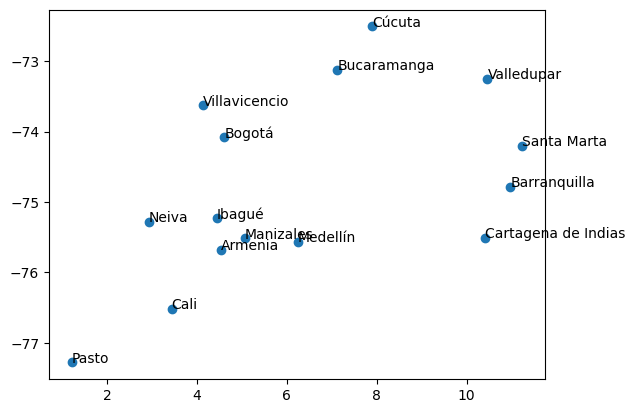

In [13]:
# Cantidad de ciudades
num_cities = len(city_coords)

# Grafica
x_coords = [city_coords[i][0] for i in city_coords]
y_coords = [city_coords[i][1] for i in city_coords]
plt.scatter(x_coords, y_coords)


for i in city_coords:
    plt.annotate(str(i), (city_coords[i][0], city_coords[i][1]))
plt.show()

In [15]:
import pulp

def distance(city1, city2):
    x1, y1 = city1
    x2, y2 = city2
    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

# Define the TSP problem
prob = pulp.LpProblem("TSP", pulp.LpMinimize)

# Define the binary decision variables
x = pulp.LpVariable.dicts("x", [(i, j) for i in city_coords for j in city_coords if i != j], cat='Binary')

# Define the objective function
prob += pulp.lpSum([distance(city_coords[i], city_coords[j]) * x[(i, j)] for i in city_coords for j in city_coords if i != j])

# Define the constraints
# Each city must be visited exactly once
for i in city_coords:
    prob += pulp.lpSum([x[(i, j)] for j in city_coords if i != j]) == 1
    prob += pulp.lpSum([x[(j, i)] for j in city_coords if i != j]) == 1

# Subtour elimination constraints
for k in city_coords:
    for S in range(2, len(city_coords)):
        for subset in itertools.combinations([i for i in city_coords if i != k], S):
            prob += pulp.lpSum([x[(i, j)] for i in subset for j in subset if i != j]) <= len(subset) - 1

In [16]:
# Solve the problem using the CBC solver
prob.solve(pulp.PULP_CBC_CMD())

# Print the status of the solution
print("Status:", pulp.LpStatus[prob.status])

# Print the optimal objective value
print("Total distance traveled:", pulp.value(prob.objective))

Status: Optimal
Total distance traveled: 24.699070247621222


Route:
Bucaramanga -> Cúcuta
Cúcuta -> Valledupar
Valledupar -> Santa Marta
Santa Marta -> Barranquilla
Barranquilla -> Cartagena de Indias
Cartagena de Indias -> Medellín
Medellín -> Manizales
Manizales -> Ibagué
Ibagué -> Armenia
Armenia -> Cali
Cali -> Pasto
Pasto -> Neiva
Neiva -> Villavicencio
Villavicencio -> Bogotá
Bogotá -> Bucaramanga


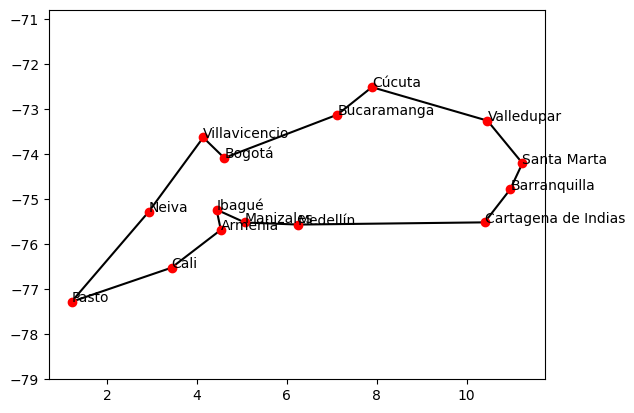

In [17]:
# Extract the solution
solution = []
start_city = "Bucaramanga"
next_city = start_city
while True:
    for j in city_coords:
        if j != next_city and x[(next_city, j)].value() == 1:
            solution.append((next_city, j))
            next_city = j
            break
    if next_city == start_city:
        break

# Print the solution
print("Route:")
for i in range(len(solution)):
    print(str(solution[i][0]) + " -> " + str(solution[i][1]))

# Plot the solution on a 2D plane
for i in range(len(city_coords)):
    plt.plot([city_coords[solution[i][0]][0], city_coords[solution[i][1]][0]], [city_coords[solution[i][0]][1], city_coords[solution[i][1]][1]], 'k-')
for i in city_coords:
    plt.plot(city_coords[i][0], city_coords[i][1], 'ro')

    plt.annotate(str(i), (city_coords[i][0], city_coords[i][1]))
plt.axis('equal')
plt.show()

# Q- Learning

In [19]:
n_cities =

NameError: ignored

In [20]:
#distancia euclidiana
def distance(city1, city2):
    x1, y1 = city_coords[city1]
    x2, y2 = city_coords[city2]
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

#Q-table
n_cities = len(city_coords)
Q = np.zeros((n_cities, n_cities))


alpha = 0.1
gamma = 0.9
min_epsilon = 0.001
max_epsilon = 1.0
epsilon_decay = 80.0
epsilon_by_episode = lambda ep_idx: (min_epsilon
         + (max_epsilon - min_epsilon)
         * math.exp (-1 * ep_idx/epsilon_decay))

#elegir la proxima ciudad
def choose_action(state, visited,epsilon):
    available_actions = [i for i in range(n_cities) if i not in visited]
    if random.uniform(0, 1) < epsilon:
        return random.choice(available_actions)
    else:
        return min(available_actions, key=lambda x: Q[state, x])

In [25]:
#entrenamiento
for episode in range(10):
    epsilon = epsilon_by_episode(episode)
    state = 6  # ciudad inicial (bucaramanga)
    visited = [state]
    total_distance = 0

    while len(visited) < n_cities:
        action = choose_action(state, visited,epsilon)
        reward = -distance(list(city_coords.keys())[state], list(city_coords.keys())[action])

        if len(visited) == n_cities - 1:
            next_max = Q[action, 0]
        else:
            next_max = min([Q[action, i] for i in range(n_cities) if i not in visited])

        Q[state, action] = (1 - alpha) * Q[state, action] + alpha * (reward + gamma * next_max)

        total_distance -= reward  #restar porque la recompensa es negativa
        visited.append(action)
        state = action
        if len(visited) == n_cities:
            print(print(visited))



[6, 4, 11, 14, 7, 8, 0, 13, 12, 5, 1, 10, 2, 9, 3]
None
[6, 3, 0, 13, 8, 9, 4, 1, 10, 7, 11, 2, 14, 12, 5]
None
[6, 9, 1, 12, 3, 5, 13, 10, 8, 11, 4, 14, 0, 7, 2]
None
[6, 12, 7, 1, 14, 4, 11, 3, 9, 2, 10, 5, 0, 8, 13]
None
[6, 1, 5, 10, 13, 14, 9, 3, 8, 2, 12, 0, 4, 7, 11]
None
[6, 9, 4, 11, 1, 12, 14, 3, 7, 8, 0, 13, 5, 2, 10]
None
[6, 1, 8, 2, 14, 7, 4, 13, 9, 11, 10, 12, 3, 5, 0]
None
[6, 1, 3, 7, 5, 10, 2, 0, 13, 14, 9, 11, 8, 12, 4]
None
[6, 5, 14, 13, 8, 4, 1, 7, 12, 11, 9, 2, 3, 0, 10]
None
[6, 14, 10, 3, 2, 4, 11, 12, 1, 9, 5, 7, 0, 8, 13]
None


In [ ]:
##pruebas
state = 6
visited = [state]
total_distance = 0

while len(visited) < n_cities:
    action = min([i for i in range(n_cities) if i not in visited], key=lambda x: Q[state, x])
    total_distance += distance(list(city_coords.keys())[state], list(city_coords.keys())[action])
    visited.append(action)
    state = action

visited.append(0)
total_distance += distance(list(city_coords.keys())[state], list(city_coords.keys())[0])

print("Mejor ruta:", [list(city_coords.keys())[i] for i in visited])
print("Distancia total:", total_distance)


Mejor ruta: ['Bucaramanga', 'Neiva', 'Valledupar', 'Villavicencio', 'Cúcuta', 'Pasto', 'Barranquilla', 'Cali', 'Santa Marta', 'Ibagué', 'Cartagena de Indias', 'Bogotá', 'Armenia', 'Medellín', 'Manizales', 'Bogotá']
Distancia total: 81.75253942078952


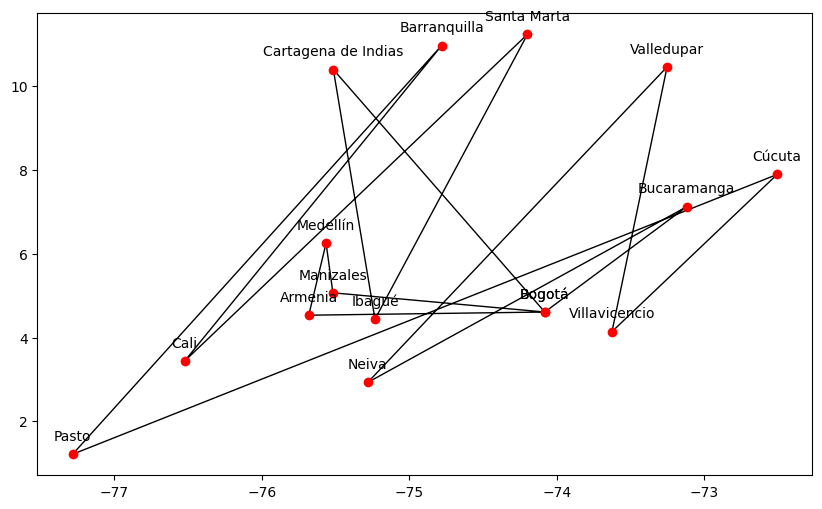

In [ ]:
import matplotlib.pyplot as plt

def plot_route(route, coords):
    x = [coords[city][1] for city in route]
    y = [coords[city][0] for city in route]

    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, c='red', zorder=2)

    for i, txt in enumerate(route):
        plt.annotate(txt, (x[i], y[i]), textcoords="offset points", xytext=(0,10), ha='center')

    plt.plot(x + [x[0]], y + [y[0]], c='black', linestyle='-', linewidth=1, zorder=1)
    plt.show()

best_route = [list(city_coords.keys())[i] for i in visited]

plot_route(best_route, city_coords)


## DQN

In [ ]:
import numpy as np
import random
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [ ]:
def distance(city1, city2):
    x1, y1 = city_coords[city1]
    x2, y2 = city_coords[city2]
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

In [ ]:
gamma = 0.9
epsilon = 1.0
min_epsilon = 0.001
epsilon_decay = 80.0
learning_rate = 0.001

n_cities = len(city_coords)
state_size = n_cities
action_size = n_cities
BUFFER_CAPACITY = 1000
BATCH_SIZE = 32

In [ ]:
model = Sequential()
model.add(Dense(24, input_dim=state_size, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(action_size, activation='linear'))
model.compile(loss='mse', optimizer=Adam(lr=learning_rate))

buffer = []

In [ ]:
def epsilon_by_episode(ep_idx):
    return min_epsilon + (1 - min_epsilon) * math.exp(-1. * ep_idx / epsilon_decay)

def sample_from_buffer():
    batch = random.sample(buffer, BATCH_SIZE)
    states, actions, rewards, next_states, dones = zip(*batch)
    return np.array(states), np.array(actions), np.array(rewards), np.array(next_states), np.array(dones)

def update_network():
    if len(buffer) < BATCH_SIZE:
        return

    states, actions, rewards, next_states, dones = sample_from_buffer()
    current_Q_values = model.predict(states)
    next_Q_values = model.predict(next_states)
    max_next_Q_values = np.max(next_Q_values, axis=1)
    target_Q_values = rewards + (1 - dones) * gamma * max_next_Q_values
    current_Q_values[np.arange(BATCH_SIZE), actions] = target_Q_values
    model.fit(states, current_Q_values, verbose=0)

In [ ]:
for episode in range(5000):
    state = np.zeros(n_cities)
    state[0] = 1  # Ciudad inicial (Bogotá)
    done = False
    visited = [0]

    while not done:
        if random.uniform(0, 1) < epsilon_by_episode(episode):
            action = random.choice([i for i in range(n_cities) if i not in visited])
        else:
            q_values = model.predict(state.reshape(1, -1))
            q_values[0][visited] = -np.inf
            action = np.argmax(q_values)

        reward = -distance(list(city_coords.keys())[visited[-1]], list(city_coords.keys())[action])

        if len(visited) == n_cities - 1:
            done = True

        next_state = np.zeros(n_cities)
        next_state[action] = 1
        visited.append(action)

        buffer.append((state, action, reward, next_state, done))

        if len(buffer) > BUFFER_CAPACITY:
            buffer.pop(0)

        update_network()
        state = next_state

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 533s 533s/step
